In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_EEG_features_2022.08.10_final.csv")

In [35]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["Subject Type/Class"]=encoder.fit_transform(dataset["Subject Type/Class"])

In [36]:
X = dataset.iloc[:, 4:]
y = dataset.iloc[:, 1]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators=9,random_state=0)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[32  7]
 [ 4 23]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        39
           1       0.77      0.85      0.81        27

    accuracy                           0.83        66
   macro avg       0.83      0.84      0.83        66
weighted avg       0.84      0.83      0.83        66

Accurecy:  0.8333333333333334


In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=7,random_state=0)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[33  6]
 [ 4 23]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        39
           1       0.79      0.85      0.82        27

    accuracy                           0.85        66
   macro avg       0.84      0.85      0.84        66
weighted avg       0.85      0.85      0.85        66

Accurecy:  0.8484848484848485


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=144,random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[36  3]
 [ 6 21]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        39
           1       0.88      0.78      0.82        27

    accuracy                           0.86        66
   macro avg       0.87      0.85      0.86        66
weighted avg       0.86      0.86      0.86        66

Accurecy:  0.8636363636363636


In [41]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
gb_probs = gb.predict_proba(X_test)
xgb_probs= xgb.predict_proba(X_test)

In [42]:
rf_probs = rf_probs[:, 1]
gb_probs = gb_probs[:, 1]
xgb_probs=xgb_probs[:, 1]


In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)


In [44]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

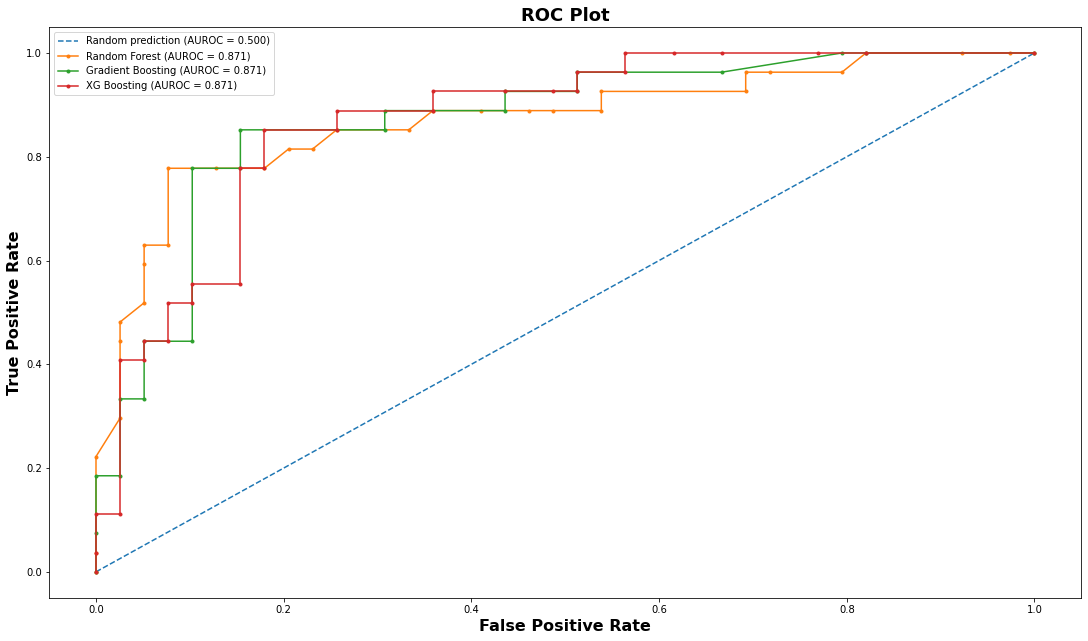

In [45]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XG Boosting (AUROC = %0.3f)' % xgb_auc)

# Title
plt.title('ROC Plot',fontsize= 18, fontweight='bold')
plt.xlabel('False Positive Rate',fontweight='bold',fontsize=16)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=16)
plt.legend() 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('ROC.png', dpi=100)
plt.show()